### Importing and Understanding Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing the dataset and storing it in variable "data"
data = pd.read_csv("TrainingData - Training.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 39 columns):
Period                                34 non-null object
EQ                                    34 non-null float64
Social_Search_Impressions             24 non-null float64
Social_Search_Working_cost            24 non-null float64
Digital_Impressions                   23 non-null float64
Digital_Working_cost                  23 non-null float64
Print_Impressions.Ads40               33 non-null float64
Print_Working_Cost.Ads50              33 non-null float64
OOH_Impressions                       10 non-null float64
OOH_Working_Cost                      7 non-null float64
SOS_pct                               34 non-null float64
Digital_Impressions_pct               10 non-null float64
CCFOT                                 34 non-null float64
Median_Temp                           34 non-null float64
Median_Rainfall                       34 non-null float64
Fuel_Price                   

In [4]:
pd.set_option('display.max_columns', 45)

Data cleaning and Preparation

In [5]:
# Looking at the first five rows
data.head()

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,2016 - Period:1,504.784933,NaN,NaN,37148.2,2045.282,NaN,NaN,NaN,NaN,7.446883,NaN,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,NaN,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,NaN,NaN,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2016 - Period:2,490.226477,NaN,NaN,50886.8,2370.584,0.000014,0.000015,NaN,NaN,11.677082,NaN,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,NaN,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,NaN,NaN,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,2016 - Period:3,479.244686,NaN,NaN,253333.2,3180.888,0.000016,0.000017,NaN,NaN,0.102858,NaN,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,NaN,NaN,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,NaN,NaN,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,2016 - Period:4,489.057428,NaN,NaN,3426239.0,13595.398,0.000016,0.000019,NaN,NaN,0.249055,NaN,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,NaN,NaN,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,NaN,NaN,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,2016 - Period:5,477.031994,NaN,NaN,552197.8,3983.134,0.000016,0.000019,NaN,NaN,13.338804,NaN,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,NaN,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [6]:
data['Period'] = data['Period'].str.slice(6,).map(lambda x: x.replace(':',''))

In [7]:
period = {' Period1': 1 , ' Period2': 2, ' Period3':3, ' Period4':4, ' Period5':5,
       ' Period6':6, ' Period7':7, ' Period8':8, ' Period9':9, ' Period10':10,
       ' Period11':11, ' Period12':12, ' Period13':13}

In [8]:
data['Period'] = data['Period'].map(period)

In [9]:
data['Period'] =  data['Period'].astype('int')

In [10]:
data.isnull().sum()

Period                                 0
EQ                                     0
Social_Search_Impressions             10
Social_Search_Working_cost            10
Digital_Impressions                   11
Digital_Working_cost                  11
Print_Impressions.Ads40                1
Print_Working_Cost.Ads50               1
OOH_Impressions                       24
OOH_Working_Cost                      27
SOS_pct                                0
Digital_Impressions_pct               24
CCFOT                                  0
Median_Temp                            0
Median_Rainfall                        0
Fuel_Price                             0
Inflation                              0
Trade_Invest                           0
Brand_Equity                           0
Avg_EQ_Price                           0
Any_Promo_pct_ACV                      0
Any_Feat_pct_ACV                      23
Any_Disp_pct_ACV                      12
EQ_Base_Price                          0
Est_ACV_Selling 

In [11]:
data['Social_Search_Impressions'] = data['Social_Search_Impressions'].fillna(data['Social_Search_Impressions'].median())
data['Digital_Working_cost'] = data['Digital_Working_cost'].fillna(data['Digital_Working_cost'].median())
data['Print_Impressions.Ads40'] = data['Print_Impressions.Ads40'].fillna(data['Print_Impressions.Ads40'].median())
data['Print_Working_Cost.Ads50'] = data['Print_Working_Cost.Ads50'].fillna(data['Print_Working_Cost.Ads50'].median())
data['Social_Search_Working_cost'] = data['Social_Search_Impressions'].fillna(data['Social_Search_Impressions'].median())
data['Digital_Impressions'] = data['Digital_Impressions'].fillna(data['Digital_Impressions'].median())
data['OOH_Impressions'] = data['OOH_Impressions'].fillna(data['OOH_Impressions'].median())
data['OOH_Working_Cost'] = data['OOH_Working_Cost'].fillna(data['OOH_Working_Cost'].median())
data['Digital_Impressions_pct'] = data['Digital_Impressions_pct'].fillna(data['Digital_Impressions_pct'].median() )
data['Any_Disp_pct_ACV'] = data['Any_Disp_pct_ACV'].fillna(data['Any_Disp_pct_ACV'].median() ) 
data['Magazine_Impressions_pct'] = data['Magazine_Impressions_pct'].fillna(data['Magazine_Impressions_pct'].median() ) 
data['TV_GRP'] = data['TV_GRP'].fillna(data['TV_GRP'].median() ) 
data['Any_Feat_pct_ACV'] = data['Any_Feat_pct_ACV'].fillna(data['Any_Feat_pct_ACV'].median() ) 

In [12]:
data.isnull().sum()

Period                                0
EQ                                    0
Social_Search_Impressions             0
Social_Search_Working_cost            0
Digital_Impressions                   0
Digital_Working_cost                  0
Print_Impressions.Ads40               0
Print_Working_Cost.Ads50              0
OOH_Impressions                       0
OOH_Working_Cost                      0
SOS_pct                               0
Digital_Impressions_pct               0
CCFOT                                 0
Median_Temp                           0
Median_Rainfall                       0
Fuel_Price                            0
Inflation                             0
Trade_Invest                          0
Brand_Equity                          0
Avg_EQ_Price                          0
Any_Promo_pct_ACV                     0
Any_Feat_pct_ACV                      0
Any_Disp_pct_ACV                      0
EQ_Base_Price                         0
Est_ACV_Selling                       0


In [13]:
data.quantile([0.0,0.01,.05,.1,.25,.5,.75,.9,.99,1])

,Period,EQ,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0.00,1.00,130.937361,2.160000e+04,2.160000e+04,2.989220e+04,1800.344000,1.400000e-05,0.000015,2.880720e+04,3.505506e+02,0.102858,0.003853,20.000000,32.95000,0.095000,7.47300,0.007832,365.430000,42.140000,44.782569,0.328645,1.633989,0.033276,1.423408,2.904612e+09,13.036065,2.075661,0.000238,32.483718,7.080951,2.200,83.883480,32.368993,38.550768,57.583497,1.504339e+06,249237.493500,0.001659,35.480731
0.01,1.33,137.769968,3.399403e+05,3.399403e+05,3.003700e+04,1881.173540,1.452800e-05,0.000016,3.776238e+06,2.788557e+04,0.125836,0.006988,25.185714,33.50275,0.098300,7.64724,0.007981,394.889100,42.140000,45.104409,0.381971,2.789902,0.034873,1.423598,2.915551e+09,13.065688,2.154802,0.000271,32.943190,14.987389,2.563,85.032343,32.741544,39.219430,57.635065,1.524458e+06,252213.577512,0.001747,36.080217
0.05,2.00,162.344113,1.436375e+06,1.436375e+06,3.476218e+04,2256.728300,1.601600e-05,0.000018,1.811841e+07,2.243804e+05,0.185815,0.344205,53.774674,35.19375,0.121250,8.14725,0.008399,480.732500,42.263500,46.803859,0.521426,5.148154,0.042435,1.426291,3.059347e+09,13.401928,2.330611,0.000970,34.709008,31.470530,11.880,88.850080,33.605920,40.915824,58.335376,1.594586e+06,265534.029235,0.004330,37.302069
0.10,2.30,173.895809,2.346793e+06,2.346793e+06,8.171072e+04,3300.360600,1.652672e-05,0.000019,2.930435e+07,3.113695e+06,0.263558,0.888884,64.688581,35.98750,0.161500,8.88130,0.009367,577.390000,42.410000,49.012364,1.476518,5.530293,0.154659,1.431215,3.213569e+09,13.611558,2.355701,0.001793,35.292608,33.937741,27.310,94.348972,34.078539,41.189117,59.263054,1.639987e+06,275292.998260,0.010365,37.999232
0.25,4.00,238.093094,6.156947e+06,6.156947e+06,1.823989e+06,9198.266931,1.666518e-05,0.000020,5.313167e+07,3.113695e+06,1.626260,2.535400,79.241071,43.67500,0.273750,9.35875,0.013435,837.805000,42.736071,49.482521,5.397553,5.559575,0.964805,1.451267,4.469045e+09,15.931733,2.377454,0.006120,36.719295,40.652666,35.100,97.051358,35.735922,41.852452,62.279815,1.862576e+06,341256.702100,0.031307,40.448477
0.50,7.50,292.629436,9.857390e+06,9.857390e+06,3.006588e+06,23205.988710,2.374541e+03,404.646896,5.313167e+07,3.113695e+06,10.404517,2.535400,100.000000,57.30000,0.392500,9.90150,0.018639,1625.310000,43.568214,51.219477,7.736179,5.559575,1.008699,1.490983,5.615173e+09,24.704770,2.437324,0.022350,38.485672,40.652666,35.100,100.759645,37.346033,44.606922,64.901897,2.013858e+06,423234.196000,0.078852,42.941337
0.75,10.00,445.078677,1.483218e+07,1.483218e+07,5.072806e+06,49256.247503,1.279915e+06,42995.889755,5.313167e+07,3.113695e+06,18.219558,2.535400,100.000000,71.08750,0.537500,10.91875,0.021555,34109.938785,44.000000,54.003264,8.762272,5.559575,1.270780,1.594085,7.887609e+09,34.926837,2.497038,0.033100,39.639360,40.652666,35.100,105.313414,40.609072,45.690191,67.734576,2.395357e+06,624275.869825,0.135781,44.038246
0.90,12.00,488.696789,2.427351e+07,2.427351e+07,6.828897e+06,81684.098035,8.232681e+06,102127.023776,1.332538e+09,3.113695e+06,26.850406,4.138939,100.000000,75.82000,0.597000,11.70650,0.024229,42204.704131,44.300000,57.975603,11.125012,5.646337,3.791717,1.670678,8.661976e+09,38.565862,2.562705,0.042180,41.813719,52.663728,44.160,114.484015,45.757486,48.393550,71.554849,2.741165e+06,796493.158600,0.221549,45.829854
0.99,13.00,532.434595,3.580770e+07,3.580770e+07,1.503154e+07,162484.424521,1.174660e+07,198906.15442

In [14]:
#EDA

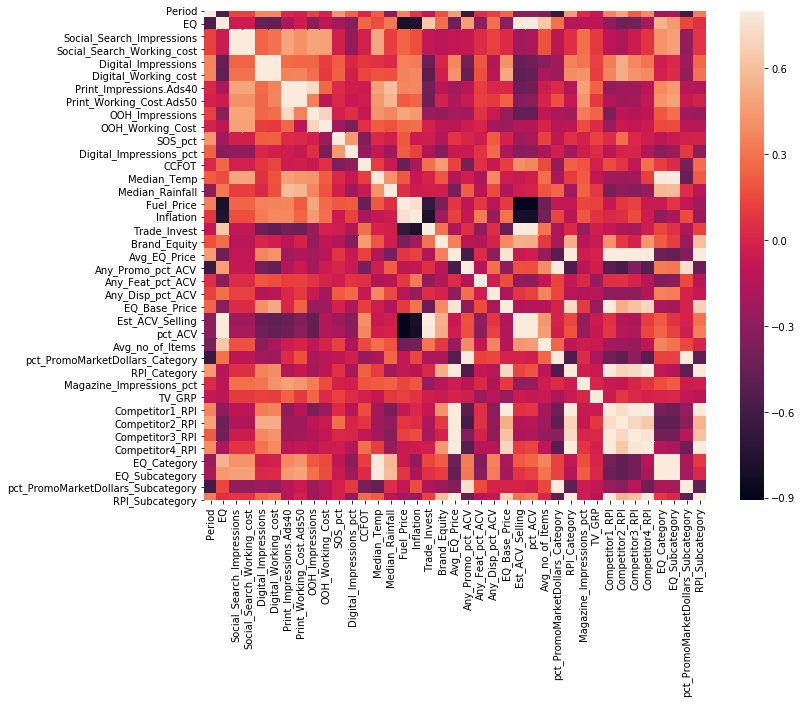

In [15]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [16]:
corrmat[corrmat['EQ']> 0.4]['EQ'].sort_values(ascending =False)
# it is observed that EQ has fairly high correlation with the below variables

EQ                   1.000000
pct_ACV              0.857306
Est_ACV_Selling      0.844173
Trade_Invest         0.641673
Avg_no_of_Items      0.636710
EQ_Category          0.547940
Any_Promo_pct_ACV    0.463025
EQ_Subcategory       0.447588
Name: EQ, dtype: float64

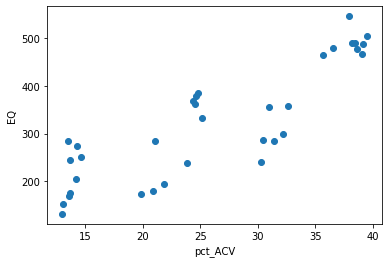

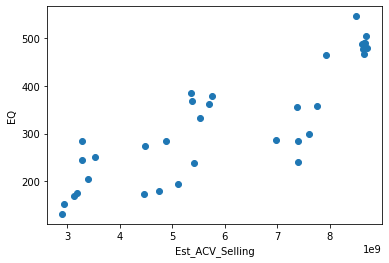

In [17]:
plt.scatter(x=data['pct_ACV'], y = data['EQ'])
plt.xlabel('pct_ACV')
plt.ylabel('EQ')
plt.show()
plt.scatter(x=data['Est_ACV_Selling'], y = data['EQ'])
plt.xlabel('Est_ACV_Selling')
plt.ylabel('EQ')
plt.show()

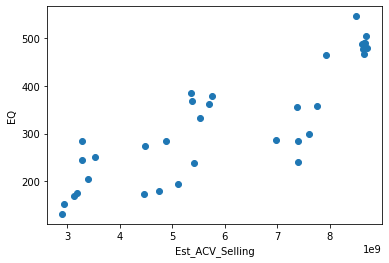

In [18]:
plt.scatter(x=data['Est_ACV_Selling'], y = data['EQ'])
plt.xlabel('Est_ACV_Selling')
plt.ylabel('EQ')
plt.show()

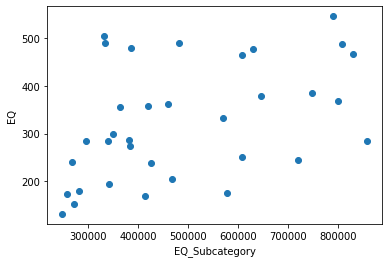

In [19]:
plt.scatter(x = data['EQ_Subcategory'], y = data['EQ'])
plt.ylabel('EQ')
plt.xlabel('EQ_Subcategory')
plt.show()

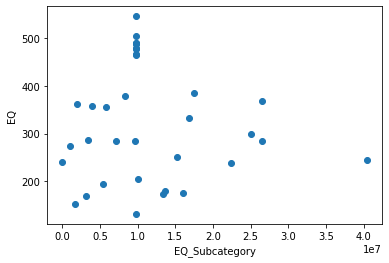

In [20]:
plt.scatter(x=data['Social_Search_Impressions'], y = data['EQ'])
plt.xlabel('EQ_Subcategory')
plt.ylabel('EQ')
plt.show()

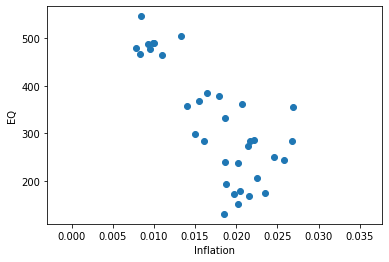

In [21]:
plt.scatter(x= data['Inflation'], y = data['EQ'])
plt.xlabel('Inflation')
plt.ylabel('EQ')
plt.show()

In [22]:
# Dropping 'EQ', as it is the dependent variable which needs to be predicted
X = data.drop(['EQ'],axis=1)

# Making 'EQ' as the dependent variable
y = data['EQ']

In [23]:
columns = list(X.columns)

In [24]:
X.head()

,Period,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,1,9857390.0,9857390.0,37148.2,2045.282,2374.540766,404.646896,53131669.2,3113695.2,7.446883,2.5354,100.0,32.950,0.5150,8.226,0.013258,42744.25684,42.410000,49.091447,9.691794,5.559575,1.688896,1.427532,8696587915,39.441025,2.611782,0.0339,35.817030,40.652666,35.1,97.173365,35.557371,44.502717,63.377268,1728388.673,331927.5394,0.162732,40.560563
1,2,9857390.0,9857390.0,50886.8,2370.584,0.000014,0.000015,53131669.2,3113695.2,11.677082,2.5354,87.5,34.625,0.2700,7.473,0.009938,36290.43956,42.410000,49.057612,9.415938,5.559575,1.687952,1.442716,8682307085,38.417224,2.522814,0.0391,36.389065,40.652666,35.1,97.850760,37.223072,45.720077,62.731742,1900859.879,334611.3806,0.231650,40.046301
2,3,9857390.0,9857390.0,253333.2,3180.888,0.000016,0.000017,53131669.2,3113695.2,0.102858,2.5354,96.0,46.700,0.3900,8.001,0.007832,34852.14166,42.410000,49.367514,5.176684,5.559575,1.008699,1.423408,8706897549,36.499442,2.477322,0.0228,36.599984,40.652666,35.1,96.397739,40.800563,41.822953,62.090417,2036436.906,387148.3582,0.125394,40.411115
3,4,9857390.0,9857390.0,3426239.0,13595.398,0.000016,0.000019,53131669.2,3113695.2,0.249055,2.5354,100.0,49.650,0.3500,8.767,0.010034,24869.55899,43.543571,50.657634,6.088273,5.559575,1.008699,1.443401,8660288592,38.135159,2.520409,0.0147,38.201852,40.652666,35.1,98.936519,36.576140,41.578429,63.374358,2113635.013,482489.6740,0.056603,42.213246
4,5,9857390.0,9857390.0,552197.8,3983.134,0.000016,0.000019,53131669.2,3113695.2,13.338804,2.5354,100.0,58.100,0.5025,9.277,0.009546,61675.32162,43.790000,50.625777,7.827112,5.559575,0.170731,1.473687,8644518558,38.629564,2.497285,0.0219,38.648805,31.702433,25.3,100.509969,36.032016,42.602412,63.291934,2402211.102,629826.6484,0.065059,43.345578


In [25]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scaling the predictors
X[columns] = scaler.fit_transform(X[columns])
X.head()

,Period,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,-1.724237,-0.202883,-0.202883,-1.038855,-0.868420,-0.548800,-0.568108,-0.349813,-0.013163,-0.393798,-0.227535,0.661733,-1.557319,0.730810,-1.636430,-0.761210,1.390469,-1.313580,-0.787392,0.686348,0.177479,0.162136,-1.104805,1.303895,1.432786,1.621620,0.605030,-1.019797,-0.140436,0.110911,-0.573144,-0.648223,0.020949,-0.425619,-1.004711,-0.846808,0.635172,-0.616652
1,-1.450293,-0.202883,-0.202883,-1.034811,-0.860175,-0.549469,-0.575534,-0.349813,-0.013163,-0.021961,-0.227535,0.016145,-1.446672,-0.732567,-2.296155,-1.356614,1.060381,-1.313580,-0.796330,0.612678,0.177479,0.161535,-0.937276,1.296978,1.323282,0.779885,0.890073,-0.797853,-0.140436,0.110911,-0.495069,-0.322860,0.435745,-0.569893,-0.558561,-0.832540,1.344665,-0.795349
2,-1.176349,-0.202883,-0.202883,-0.975218,-0.839638,-0.549469,-0.575534,-0.349813,-0.013163,-1.039341,-0.227535,0.455145,-0.649021,-0.015811,-1.833559,-1.734350,0.986817,-1.313580,-0.714461,-0.519449,0.177479,-0.270943,-1.150311,1.308888,1.118158,0.349489,-0.003428,-0.716018,-0.140436,0.110911,-0.662540,0.375935,-0.892137,-0.713228,-0.207849,-0.553226,0.250790,-0.668582
3,-0.902405,-0.202883,-0.202883,-0.041216,-0.575687,-0.549469,-0.575534,-0.349813,-0.013163,-1.026490,-0.227535,0.661733,-0.454149,-0.254730,-1.162444,-1.339428,0.476245,0.225794,-0.373640,-0.276002,0.177479,-0.270943,-0.929719,1.286313,1.293112,0.757139,-0.447437,-0.094509,-0.140436,0.110911,-0.369926,-0.449226,-0.975455,-0.426270,-0.008152,-0.046342,-0.457388,-0.042374
4,-0.628460,-0.202883,-0.202883,-0.887241,-0.819306,-0.549469,-0.575534,-0.349813,-0.013163,0.124105,-0.227535,0.661733,0.104041,0.656148,-0.715618,-1.426949,2.358722,0.560440,-0.382056,0.188369,0.177479,-0.804475,-0.595566,1.278675,1.345993,0.538358,-0.052762,0.078905,-0.799118,-0.885194,-0.188574,-0.555510,-0.626549,-0.444691,0.738339,0.736979,-0.370342,0.351091


In [26]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)

 Model building:
 Using "LinearRegression from scikit learn" for model building. The features would be selected using RFE( Recursive Feature Elimination)

Model Number-1

In [27]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [28]:
import statsmodels.api as sm

In [29]:
lm = LinearRegression()
rfe = RFE(lm, 15)   
rfe = rfe.fit(X_train, y_train)

In [30]:
X.head()

,Period,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,-1.724237,-0.202883,-0.202883,-1.038855,-0.868420,-0.548800,-0.568108,-0.349813,-0.013163,-0.393798,-0.227535,0.661733,-1.557319,0.730810,-1.636430,-0.761210,1.390469,-1.313580,-0.787392,0.686348,0.177479,0.162136,-1.104805,1.303895,1.432786,1.621620,0.605030,-1.019797,-0.140436,0.110911,-0.573144,-0.648223,0.020949,-0.425619,-1.004711,-0.846808,0.635172,-0.616652
1,-1.450293,-0.202883,-0.202883,-1.034811,-0.860175,-0.549469,-0.575534,-0.349813,-0.013163,-0.021961,-0.227535,0.016145,-1.446672,-0.732567,-2.296155,-1.356614,1.060381,-1.313580,-0.796330,0.612678,0.177479,0.161535,-0.937276,1.296978,1.323282,0.779885,0.890073,-0.797853,-0.140436,0.110911,-0.495069,-0.322860,0.435745,-0.569893,-0.558561,-0.832540,1.344665,-0.795349
2,-1.176349,-0.202883,-0.202883,-0.975218,-0.839638,-0.549469,-0.575534,-0.349813,-0.013163,-1.039341,-0.227535,0.455145,-0.649021,-0.015811,-1.833559,-1.734350,0.986817,-1.313580,-0.714461,-0.519449,0.177479,-0.270943,-1.150311,1.308888,1.118158,0.349489,-0.003428,-0.716018,-0.140436,0.110911,-0.662540,0.375935,-0.892137,-0.713228,-0.207849,-0.553226,0.250790,-0.668582
3,-0.902405,-0.202883,-0.202883,-0.041216,-0.575687,-0.549469,-0.575534,-0.349813,-0.013163,-1.026490,-0.227535,0.661733,-0.454149,-0.254730,-1.162444,-1.339428,0.476245,0.225794,-0.373640,-0.276002,0.177479,-0.270943,-0.929719,1.286313,1.293112,0.757139,-0.447437,-0.094509,-0.140436,0.110911,-0.369926,-0.449226,-0.975455,-0.426270,-0.008152,-0.046342,-0.457388,-0.042374
4,-0.628460,-0.202883,-0.202883,-0.887241,-0.819306,-0.549469,-0.575534,-0.349813,-0.013163,0.124105,-0.227535,0.661733,0.104041,0.656148,-0.715618,-1.426949,2.358722,0.560440,-0.382056,0.188369,0.177479,-0.804475,-0.595566,1.278675,1.345993,0.538358,-0.052762,0.078905,-0.799118,-0.885194,-0.188574,-0.555510,-0.626549,-0.444691,0.738339,0.736979,-0.370342,0.351091


In [31]:
col = X_train.columns[rfe.support_]
col

Index(['OOH_Impressions', 'OOH_Working_Cost', 'Median_Rainfall', 'Fuel_Price',
       'Inflation', 'Trade_Invest', 'EQ_Base_Price', 'RPI_Category', 'TV_GRP',
       'Competitor1_RPI', 'Competitor3_RPI', 'Competitor4_RPI', 'EQ_Category',
       'EQ_Subcategory', 'pct_PromoMarketDollars_Subcategory'],
      dtype='object')

In [32]:
X_train.columns[~rfe.support_]

Index(['Period', 'Social_Search_Impressions', 'Social_Search_Working_cost',
       'Digital_Impressions', 'Digital_Working_cost',
       'Print_Impressions.Ads40', 'Print_Working_Cost.Ads50', 'SOS_pct',
       'Digital_Impressions_pct', 'CCFOT', 'Median_Temp', 'Brand_Equity',
       'Avg_EQ_Price', 'Any_Promo_pct_ACV', 'Any_Feat_pct_ACV',
       'Any_Disp_pct_ACV', 'Est_ACV_Selling', 'pct_ACV', 'Avg_no_of_Items',
       'pct_PromoMarketDollars_Category', 'Magazine_Impressions_pct',
       'Competitor2_RPI', 'RPI_Subcategory'],
      dtype='object')

Similarly building models using statsmodel, for detailed statistics about the features

In [33]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe['Period'] = X_train['Period']

In [34]:
X_train_rfe.head()

,OOH_Impressions,OOH_Working_Cost,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,EQ_Base_Price,RPI_Category,TV_GRP,Competitor1_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,Period
31,2.187133,-0.013163,0.491892,1.409873,0.734548,-0.669067,-0.415304,-0.216960,0.110911,-0.202155,0.866526,0.459243,-0.674852,-0.405397,-0.938146,0.741261
19,-0.402638,-0.013163,-0.613108,0.161388,0.193398,-0.748093,1.255239,0.577335,-3.233156,0.195859,0.341743,0.308579,0.387268,0.414603,0.070928,0.467317
6,-0.349813,-0.013163,0.193243,-0.395830,-1.653388,1.298482,-0.989832,0.468871,1.086687,-0.121008,-0.368955,0.031121,1.941452,1.794698,-0.815798,-0.080572
9,-0.349813,-0.013163,-0.583243,-0.668307,-0.634307,0.500471,-0.025116,0.446310,0.110911,0.332573,0.064811,0.393005,-0.257213,-0.372538,-0.779951,0.741261
0,-0.349813,-0.013163,0.730810,-1.636430,-0.761210,1.390469,-1.104805,-1.019797,0.110911,-0.573144,0.020949,-0.425619,-1.004711,-0.846808,0.635172,-1.724237


In [35]:
# Adding the intercept line, as default statsmodels' pass through the origin
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   

In [36]:
# Looking at the summary report of the statsmodel
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     45.75
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.25e-07
Time:                        23:05:55   Log-Likelihood:                -108.62
No. Observations:                  27   AIC:                             251.2
Df Residuals:                      10   BIC:                             273.3
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [39]:
def vif(X):
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [40]:
vif(X_train_new)

,Features,VIF
9,Competitor1_RPI,277.01
7,RPI_Category,185.14
12,EQ_Category,121.69
13,EQ_Subcategory,108.36
6,EQ_Base_Price,52.66
4,Inflation,18.35
11,Competitor4_RPI,18.19
3,Fuel_Price,16.32
10,Competitor3_RPI,13.62
15,Period,9.19


In [41]:
# dropping Competitor4_RPI as it has high Competitor4_RPI

In [42]:
X_train_new = X_train_new.drop('Competitor1_RPI',1)

In [43]:
X_train_new = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train,X_train_new).fit()  

In [44]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     45.43
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.04e-07
Time:                        23:05:55   Log-Likelihood:                -110.84
No. Observations:                  27   AIC:                             253.7
Df Residuals:                      11   BIC:                             274.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [45]:
X_train_new = X_train_new.drop('const',1)

In [46]:
vif(X_train_new)

,Features,VIF
11,EQ_Category,109.80
12,EQ_Subcategory,107.58
7,RPI_Category,49.70
6,EQ_Base_Price,30.63
4,Inflation,18.29
10,Competitor4_RPI,17.21
9,Competitor3_RPI,13.50
3,Fuel_Price,12.64
0,OOH_Impressions,7.42
1,OOH_Working_Cost,5.24


In [47]:
X_train_new = X_train_new.drop('Trade_Invest',1)

In [48]:
X_train_new = sm.add_constant(X_train_new)

In [49]:
lm3 = sm.OLS(y_train,X_train_new).fit()  

In [50]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     53.09
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.37e-08
Time:                        23:05:56   Log-Likelihood:                -110.84
No. Observations:                  27   AIC:                             251.7
Df Residuals:                      12   BIC:                             271.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [51]:
X_train_new = X_train_new.drop('const',axis =1)

In [52]:
vif(X_train_new)

,Features,VIF
10,EQ_Category,106.73
11,EQ_Subcategory,104.38
6,RPI_Category,45.66
5,EQ_Base_Price,25.03
4,Inflation,18.25
9,Competitor4_RPI,17.08
8,Competitor3_RPI,13.26
3,Fuel_Price,11.34
0,OOH_Impressions,7.40
1,OOH_Working_Cost,5.22


In [53]:
# Dropping constant as we don't need it while analysing variance inflation factor
X_train_new = X_train_new.drop('EQ_Base_Price', axis=1)

In [54]:
X_train_new = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train,X_train_new).fit()  
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     61.94
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.67e-09
Time:                        23:05:56   Log-Likelihood:                -110.84
No. Observations:                  27   AIC:                             249.7
Df Residuals:                      13   BIC:                             267.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [55]:
X_train_new = X_train_new.drop('const',axis =1)

In [56]:
vif(X_train_new)

,Features,VIF
9,EQ_Category,99.35
10,EQ_Subcategory,94.77
5,RPI_Category,17.12
8,Competitor4_RPI,15.10
7,Competitor3_RPI,10.31
3,Fuel_Price,9.82
0,OOH_Impressions,7.20
4,Inflation,6.76
1,OOH_Working_Cost,3.36
12,Period,3.18


In [57]:
X_train_new = X_train_new.drop('RPI_Category', axis=1)

In [58]:
X_train_new = sm.add_constant(X_train_new)
lm5 = sm.OLS(y_train,X_train_new).fit()  
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     69.76
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           2.40e-10
Time:                        23:05:56   Log-Likelihood:                -111.31
No. Observations:                  27   AIC:                             248.6
Df Residuals:                      14   BIC:                             265.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [59]:
X_train_new = X_train_new.drop('const',axis =1)
vif(X_train_new)

,Features,VIF
8,EQ_Category,97.40
9,EQ_Subcategory,93.90
3,Fuel_Price,9.82
6,Competitor3_RPI,9.31
7,Competitor4_RPI,7.92
4,Inflation,6.75
0,OOH_Impressions,5.53
1,OOH_Working_Cost,3.15
11,Period,2.59
2,Median_Rainfall,2.23


In [60]:
X_train_new = X_train_new.drop('Median_Rainfall', axis=1)
X_train_new = sm.add_constant(X_train_new)
lm6 = sm.OLS(y_train,X_train_new).fit()  
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     66.96
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.07e-10
Time:                        23:05:56   Log-Likelihood:                -113.92
No. Observations:                  27   AIC:                             251.8
Df Residuals:                      15   BIC:                             267.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [61]:
X_train_new = X_train_new.drop('const',axis =1)
vif(X_train_new)

,Features,VIF
7,EQ_Category,92.37
8,EQ_Subcategory,92.17
2,Fuel_Price,9.19
5,Competitor3_RPI,8.68
6,Competitor4_RPI,7.43
3,Inflation,6.54
0,OOH_Impressions,4.72
1,OOH_Working_Cost,2.97
10,Period,2.55
9,pct_PromoMarketDollars_Subcategory,2.08


In [62]:
X_train_new = X_train_new.drop('OOH_Impressions', axis=1)
X_train_new = sm.add_constant(X_train_new)
lm7 = sm.OLS(y_train,X_train_new).fit()  
print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     69.35
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.05e-11
Time:                        23:05:56   Log-Likelihood:                -115.57
No. Observations:                  27   AIC:                             253.1
Df Residuals:                      16   BIC:                             267.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [63]:
X_train_new = X_train_new.drop('const',axis =1)
vif(X_train_new)

,Features,VIF
7,EQ_Subcategory,77.58
6,EQ_Category,76.72
1,Fuel_Price,8.45
4,Competitor3_RPI,7.36
5,Competitor4_RPI,7.06
2,Inflation,6.43
9,Period,2.54
8,pct_PromoMarketDollars_Subcategory,2.05
0,OOH_Working_Cost,1.28
3,TV_GRP,1.09


In [64]:
X_train_new = X_train_new.drop('EQ_Subcategory', axis=1)
X_train_new = sm.add_constant(X_train_new)
lm8 = sm.OLS(y_train,X_train_new).fit()  
print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     54.20
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           9.42e-11
Time:                        23:05:56   Log-Likelihood:                -120.99
No. Observations:                  27   AIC:                             262.0
Df Residuals:                      17   BIC:                             274.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [65]:
X_train_new = X_train_new.drop('const',axis =1)
vif(X_train_new)

,Features,VIF
1,Fuel_Price,7.84
4,Competitor3_RPI,6.89
2,Inflation,6.40
5,Competitor4_RPI,5.28
6,EQ_Category,3.17
8,Period,2.53
7,pct_PromoMarketDollars_Subcategory,1.89
0,OOH_Working_Cost,1.23
3,TV_GRP,1.08


In [66]:
X_train_new = X_train_new.drop('Competitor4_RPI', axis=1)
X_train_new = sm.add_constant(X_train_new)
lm9 = sm.OLS(y_train,X_train_new).fit()  
print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     64.33
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.15e-11
Time:                        23:05:56   Log-Likelihood:                -121.03
No. Observations:                  27   AIC:                             260.1
Df Residuals:                      18   BIC:                             271.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [67]:
X_train_new = X_train_new.drop('const',axis =1)
vif(X_train_new)

,Features,VIF
2,Inflation,6.00
1,Fuel_Price,5.97
5,EQ_Category,2.64
7,Period,2.04
4,Competitor3_RPI,1.95
6,pct_PromoMarketDollars_Subcategory,1.82
0,OOH_Working_Cost,1.22
3,TV_GRP,1.08


In [68]:
X_train_new = X_train_new.drop('Competitor3_RPI', axis=1)
X_train_new = sm.add_constant(X_train_new)
lm10 = sm.OLS(y_train,X_train_new).fit()  
print(lm10.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     63.55
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           7.60e-12
Time:                        23:05:56   Log-Likelihood:                -123.63
No. Observations:                  27   AIC:                             263.3
Df Residuals:                      19   BIC:                             273.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [69]:
X_train_new = X_train_new.drop('const',axis =1)
vif(X_train_new)

,Features,VIF
2,Inflation,5.57
1,Fuel_Price,5.09
6,Period,2.04
5,pct_PromoMarketDollars_Subcategory,1.82
4,EQ_Category,1.65
0,OOH_Working_Cost,1.22
3,TV_GRP,1.07


In [70]:
X_train_new = X_train_new.drop('OOH_Working_Cost', axis=1)
X_train_new = sm.add_constant(X_train_new)
lm11 = sm.OLS(y_train,X_train_new).fit()  
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     66.95
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           3.48e-12
Time:                        23:05:56   Log-Likelihood:                -125.61
No. Observations:                  27   AIC:                             265.2
Df Residuals:                      20   BIC:                             274.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [71]:
X_train_new = X_train_new.drop('const',axis =1)
vif(X_train_new)

,Features,VIF
1,Inflation,5.26
0,Fuel_Price,5.07
5,Period,2.01
4,pct_PromoMarketDollars_Subcategory,1.74
3,EQ_Category,1.58
2,TV_GRP,1.05


In [72]:
X_train_new = X_train_new.drop('pct_PromoMarketDollars_Subcategory', axis=1)
X_train_new = sm.add_constant(X_train_new)
lm12 = sm.OLS(y_train,X_train_new).fit()  
print(lm12.summary())

                            OLS Regression Results                            
Dep. Variable:                     EQ   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     81.59
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           4.95e-13
Time:                        23:05:56   Log-Likelihood:                -126.04
No. Observations:                  27   AIC:                             264.1
Df Residuals:                      21   BIC:                             271.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         323.6969      5.652     57.266      

Residual analysis:

To check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [73]:
X_train_new

,const,Fuel_Price,Inflation,TV_GRP,EQ_Category,Period
31,1.0,1.409873,0.734548,0.110911,-0.674852,0.741261
19,1.0,0.161388,0.193398,-3.233156,0.387268,0.467317
6,1.0,-0.395830,-1.653388,1.086687,1.941452,-0.080572
9,1.0,-0.668307,-0.634307,0.110911,-0.257213,0.741261
0,1.0,-1.636430,-0.761210,0.110911,-1.004711,-1.724237
26,1.0,1.017367,0.905231,0.110911,-0.275300,-0.902405
12,1.0,-0.553534,0.214285,0.110911,-1.263225,1.563094
11,1.0,-0.800602,-0.253887,0.110911,-0.931382,1.289149
4,1.0,-0.715618,-1.426949,-0.885194,0.738339,-0.628460
28,1.0,1.435281,1.652609,0.212554,1.630781,-0.080572


In [74]:
y_train_price = lm12.predict(X_train_new)

In [75]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

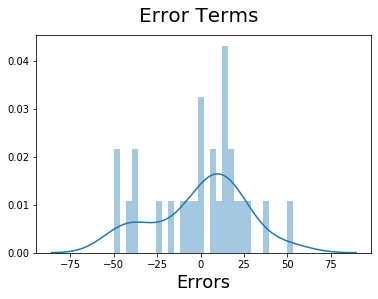

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 30)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [77]:
from sklearn.metrics import r2_score
r2_score(y_train, y_train_price)

0.9510417888038579

In [78]:
y_test.head()

25    274.430757
33    130.937361
30    175.432319
5     487.855299
1     490.226477
Name: EQ, dtype: float64

In [79]:
X_train_new.columns

Index(['const', 'Fuel_Price', 'Inflation', 'TV_GRP', 'EQ_Category', 'Period'], dtype='object')

In [80]:
# Selecting all columns except constant('const'), as it is not present in test data
X_test1=X_test[['Fuel_Price', 'Inflation', 'TV_GRP', 'EQ_Category', 'Period']]

In [81]:
# adding the constant line for test data
X_test_new = sm.add_constant(X_test1)

In [82]:
X_test_new

,const,Fuel_Price,Inflation,TV_GRP,EQ_Category,Period
25,1.0,0.564408,0.704181,0.110911,-0.510519,-1.176349
33,1.0,1.920656,0.176098,0.110911,-1.584285,1.563094
30,1.0,1.345915,1.075682,0.903729,0.290521,0.467317
5,1.0,-0.236375,-1.472869,1.391617,1.759452,-0.354516
1,1.0,-2.296155,-1.356614,0.110911,-0.558561,-1.450293
13,1.0,-0.393202,1.682692,0.110911,-0.581814,-1.450293
18,1.0,-0.277553,-0.190725,-3.121348,1.267816,0.193372


#### Applying the scaling on the test sets

In [83]:
# Making predictions
y_pred = lm12.predict(X_test_new)

In [84]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9157796898350071

It can be seen that R-square of our built model on train and test data is 95% and 91% respectively it seems to be reasonably good model .
Let us know see our model performance on separate test data provided. 

In [85]:
test_data = pd.read_csv('TestData - Test.csv')

In [86]:
# we are mapping period 1-13 as 1-13 being an ordinal variable . 

In [87]:
test_data['Period'] = test_data['Period'].str.slice(6,).map(lambda x: x.replace(':',''))
period = {' Period1': 1 , ' Period2': 2, ' Period3':3, ' Period4':4, ' Period5':5,
       ' Period6':6, ' Period7':7, ' Period8':8, ' Period9':9, ' Period10':10,
       ' Period11':11, ' Period12':12, ' Period13':13}
test_data['Period'] = test_data['Period'].map(period)
test_data['Period'] =  test_data['Period'].astype('int')

In [88]:
y_test_data = test_data['EQ']
test_data = test_data.drop('EQ',1)

In [89]:
test_data[test_data.columns] = scaler.transform(test_data[test_data.columns])

In [90]:
test_data

,Period,Social_Search_Impressions,Social_Search_Working_cost,Digital_Impressions,Digital_Working_cost,Print_Impressions.Ads40,Print_Working_Cost.Ads50,OOH_Impressions,OOH_Working_Cost,SOS_pct,Digital_Impressions_pct,CCFOT,Median_Temp,Median_Rainfall,Fuel_Price,Inflation,Trade_Invest,Brand_Equity,Avg_EQ_Price,Any_Promo_pct_ACV,Any_Feat_pct_ACV,Any_Disp_pct_ACV,EQ_Base_Price,Est_ACV_Selling,pct_ACV,Avg_no_of_Items,pct_PromoMarketDollars_Category,RPI_Category,Magazine_Impressions_pct,TV_GRP,Competitor1_RPI,Competitor2_RPI,Competitor3_RPI,Competitor4_RPI,EQ_Category,EQ_Subcategory,pct_PromoMarketDollars_Subcategory,RPI_Subcategory
0,-1.724237,-1.210439,-1.364651,NaN,NaN,-0.549469,-0.575534,NaN,NaN,-1.023726,NaN,0.661733,-1.392174,0.462027,-0.183807,0.910901,-0.762109,1.456711,-0.303454,0.385923,0.210168,NaN,0.656452,0.680873,0.678686,1.319237,2.057653,-0.781672,NaN,NaN,-0.437314,-0.606102,-0.565138,0.027190,-1.088252,-0.949825,2.914955,-0.594592
1,-0.354516,1.209284,-1.353928,1.106184,1.903081,2.436577,3.824375,-0.251772,-2.16046,0.006342,-0.387781,0.661733,0.731593,0.372432,-0.055892,-0.292344,-0.775763,0.641919,1.554716,0.231897,NaN,NaN,1.321894,-0.226087,-0.242433,0.655295,-0.710554,2.213577,-0.225841,-0.194019,1.608150,-0.215362,2.967222,2.595971,1.442596,1.741186,-0.785304,2.571556
2,-1.724237,-1.031745,-1.364351,NaN,NaN,-0.545287,-0.545829,NaN,NaN,1.100257,NaN,-0.199050,-1.755493,-1.419459,0.472414,0.094518,-0.766521,-0.811125,0.654929,-0.079585,NaN,-0.725683,2.234657,-0.620315,-0.593651,0.024202,1.739721,0.089602,NaN,NaN,0.592768,0.210516,1.605659,-0.048469,-1.220177,-0.906901,2.188027,0.116525
3,-0.354516,0.448306,-1.358642,0.555931,0.978215,-0.549427,-0.574605,NaN,NaN,-1.012470,0.733481,0.661733,0.982614,1.074256,1.709509,1.550276,-0.735952,-1.422219,-1.439394,0.494304,NaN,0.208269,-0.594823,-1.262504,-1.279627,0.063248,0.407692,-1.312552,NaN,NaN,-1.355095,-0.931543,-1.141515,-1.560149,1.548827,1.632571,-0.236352,-1.326542
4,1.015205,-1.331819,-1.364906,-1.031210,NaN,-0.005724,-0.128706,1.725640,-0.73304,-0.741431,-0.386849,-0.234184,-0.470664,-0.553378,1.465069,0.896899,-0.669838,-1.680236,0.360930,-1.427895,NaN,-0.220616,-0.377799,-1.351196,-1.322962,-1.825721,-1.181423,-0.222784,NaN,NaN,-0.162640,-0.207493,0.460556,0.087129,-1.262279,-0.859656,-0.974168,-0.479494


In [91]:
test_data = test_data[['Fuel_Price', 'Inflation', 'TV_GRP', 'EQ_Category', 'Period']]
test_data = sm.add_constant(test_data)

In [92]:
test_data['const']  = 1

In [93]:
test_data['TV_GRP'] = test_data['TV_GRP'].fillna(test_data['TV_GRP'].median() ) 

In [94]:
y_pred_test = lm12.predict(test_data)

In [95]:
 y_test_data

0    392.326431
1    300.922056
2    247.315476
3    278.317524
4    161.529279
Name: EQ, dtype: float64